# Titanic Data Analysis

The data set which I am going to explore contains the information gathered from 891 of the 2224 passengers and crew on board the Titanic. The Data set has various columns like 

### Data Dictionary

- **Survival** : Survival(0 = No, 1 = Yes)
- **Pclass**   : Ticket class(1 = 1st, 2 = 2nd, 3 = 3rd)
- **Sex**
- **Age**
- **Sibsp** : # of siblings / spouses aboard the Titanic
- **Parch** : # of parents / children aboard the Titanic
- **Ticket** : Ticket Number
- **Fare**
- **Cabin** : Cabin Number
- **Embarked** : Port of Embarkation.(C = Cherbourg, Q = Queenstown, S = Southampton)


### Variable Notes

**Pclass:** A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

**Age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

** Sibsp:**  The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

**Parch:** The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

## Questions To Explore

- **Did Gender played any role in survival** ?
- **Did Pclass(A proxy for socio-economic status (SES)) played any role in survival ?**
- **Did Females of any particular Pclass receive special priority ?**
- **Did any particular age got priority over other age groups ?**
- **Did family relations(Parch value) played any role in survival ?**

## Loading Data From Csv

For importing data from csv, pandas has a built in function which reads the information into a dataframe. 

In [1]:
import pandas as pd

titanic_data = pd.read_csv('titanic_data.csv')
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- The above data shows that all the columns have data count as 891 except the age which we will handle in age data exploration part. 

## Data Cleaning

- As we see that cabin data mostly contains NaN and won't be much useful for exploration,
- And same lies with the Embarked column and Fare Column, this data too won't be much useful, so lets drop these columns from dataframe.

In [6]:
del titanic_data['Cabin']
del titanic_data['Embarked']
titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250


## Overall Metrics

The information has a column called 'survived' whose values are either 0 or 1, using this column we can count the total number of casualties and survivors.

In [7]:
total_no_passengers = len(titanic_data['PassengerId'])
survival_data = titanic_data['Survived']
survivied = (survival_data == 1).sum()
casualties = (survival_data == 0).sum()

print('------------------------------------------')
print('Total number of passengers on board: ',total_no_passengers)
print('Total number of survivors: ',survivied)
print('Total number of casualties: ',casualties)
print('------------------------------------------')

------------------------------------------
Total number of passengers on board:  891
Total number of survivors:  342
Total number of casualties:  549
------------------------------------------


- The following pie chart shows the distribution of survivors and casulaties

Populating the interactive namespace from numpy and matplotlib


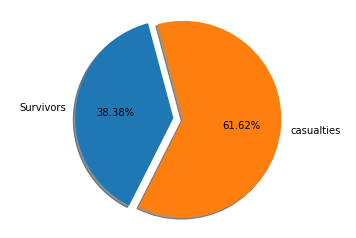

In [8]:
%pylab inline
import matplotlib.pyplot as plt

def drawPieChart(labels,sizes,explode,startangle):
    '''
    Function to produce pie charts
    '''
    plt.pie(sizes, explode=explode, labels=labels,autopct='%1.2f%%', shadow=True, startangle=startangle) 
    plt.axis('equal')
    plt.show()
    
drawPieChart(['Survivors', 'casualties'],[survivied,casualties],(0.1, 0),105)    

## Overall Metrics By Gender

The above metrics show the total number of survivors and casualties, now let us explore these metrics based on the gender.
Using the gender data and survival data, we can count the total number of female and male survivors. when we calulate female survivors and male survivors in terms of percentages with respect to total survivors  , we find that female survivors constitute (68.13%) and male survivors constitute (31.87%). Using this information, we can say that females where given more preference in using life saving materials like life boats, etc.



In [9]:
gender_data = titanic_data['Sex']

male_count = (gender_data == 'male').sum()
female_count = (gender_data == 'female').sum()

male_survivors = ((gender_data == 'male') & (survival_data == 1)).sum()
female_survivors = ((gender_data == 'female') & (survival_data == 1)).sum()

male_casualties = male_count - male_survivors
female_casualties = female_count - female_survivors

print('-------------------------------------')
print('Total number of males: ',male_count)
print('Total number of male survivors: ',male_survivors)
print('Total number of male casualties: ',male_casualties)
print('--------------------------------------')
print('Total number of females: ',female_count)
print('Total number of female survivors: ',female_survivors)
print('Total number of female casualties: ',female_casualties)
print('--------------------------------------')

-------------------------------------
Total number of males:  577
Total number of male survivors:  109
Total number of male casualties:  468
--------------------------------------
Total number of females:  314
Total number of female survivors:  233
Total number of female casualties:  81
--------------------------------------


- The following pie chart shows the distribution of male and female survivors

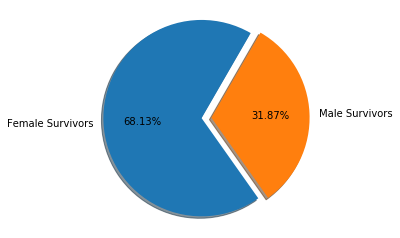

In [10]:
drawPieChart(['Female Survivors', 'Male Survivors'],[female_survivors,male_survivors],(0.1, 0),60)

## Explore Casualties based on Pclass

Let us exlpore the Casualties based on Pclass(A proxy for socio-economic status (SES), 1st = Upper, 2nd = Middle, 3rd = Lower) to see whether passengers were given priority based on their class. Now Lets explore some metrics related to Pclass.


In [11]:
pclass = titanic_data['Pclass']
pclass_values = sort(pclass.unique())

def calculateSurvivalRate(condition=True):
    '''
    Function to calculate survival Rates
    '''
    print('----------------------------------') 
    for val in pclass_values:
        pclass_count = ((pclass == val) & (condition)).sum()
        pclass_survivors = ((pclass == val)&(survival_data == 1) & (condition)).sum()
        pclass_casualties = ((pclass == val)&(survival_data == 0) & (condition)).sum()
        
        print('Pclass {0} Metrics: '.format(val))
        print('Total Count : ',pclass_count)
        print('Total Number Of Survivors: ',pclass_survivors)
        print('Total Number Of casualties: ',pclass_casualties)
        print('Survival Rate: {0}%'.format(round((pclass_survivors/pclass_count)*100.0,2)))
        print('----------------------------------') 

In [12]:
calculateSurvivalRate()

----------------------------------
Pclass 1 Metrics: 
Total Count :  216
Total Number Of Survivors:  136
Total Number Of casualties:  80
Survival Rate: 62.96%
----------------------------------
Pclass 2 Metrics: 
Total Count :  184
Total Number Of Survivors:  87
Total Number Of casualties:  97
Survival Rate: 47.28%
----------------------------------
Pclass 3 Metrics: 
Total Count :  491
Total Number Of Survivors:  119
Total Number Of casualties:  372
Survival Rate: 24.24%
----------------------------------


- From the above listed metrics, we can say that people from upper class(pclass = 1) were given priority as they had the highest survival rate of (62.96%) which is greater than the survival rates of both middle class and lower class. Lets plot a histogram of casualties to get a more precise picture

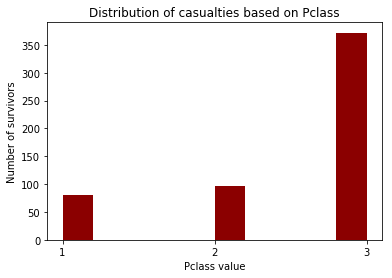

In [13]:
pclass_casualties = pclass[survival_data == 0]

def drawHistogram(data,title,xlabel,ylabel,xticks=None,yticks=None,bins=None,color=None):
    '''
    Function to produce histogram
    '''
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if xticks != None :
        plt.xticks(xticks)
    if yticks != None :
        plt.yticks(yticks)
    plt.hist(data,bins=bins,color=color)
    plt.show()

drawHistogram(pclass_casualties,'Distribution of casualties based on Pclass',
              'Pclass value','Number of survivors',range(1,4),color='DarkRed')

- The Histogram above shows the distribution of casualties based on their pclass, as we can observe that lower class has the   most number of casualties when compared to upper class and middle class. So, Now we can say that lower class people got the   least priority for life saving materials like life boats, etc. 
- As we already know that females were given more priority then males, Lets explore the female survival based on Pclass to see whether females of any particular class got special priority.

In [14]:
calculateSurvivalRate(gender_data == 'female')

----------------------------------
Pclass 1 Metrics: 
Total Count :  94
Total Number Of Survivors:  91
Total Number Of casualties:  3
Survival Rate: 96.81%
----------------------------------
Pclass 2 Metrics: 
Total Count :  76
Total Number Of Survivors:  70
Total Number Of casualties:  6
Survival Rate: 92.11%
----------------------------------
Pclass 3 Metrics: 
Total Count :  144
Total Number Of Survivors:  72
Total Number Of casualties:  72
Survival Rate: 50.0%
----------------------------------


- The above data shows that females of upper class and middle class got priority, as they had the highest survival rates of (96.81%) and  (92.11%) when compared to the females of lower class who had a survival rate of only (50%). 
- The below Histogram shows the distribution of females casulaties based on Pclass.

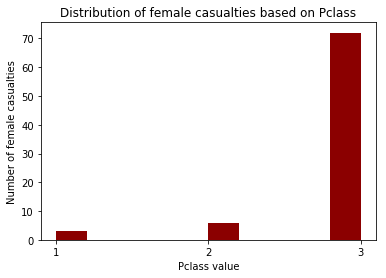

In [15]:
pclass_female_casualties = pclass[(survival_data == 0) & (gender_data == 'female')]
drawHistogram(pclass_female_casualties,'Distribution of female casualties based on Pclass',
              'Pclass value','Number of female casualties',xticks=range(1,4),color='DarkRed')

- Now lets explore male survival based on pclass to see whether males of any particular class got special priority.

In [16]:
calculateSurvivalRate(gender_data == 'male')

----------------------------------
Pclass 1 Metrics: 
Total Count :  122
Total Number Of Survivors:  45
Total Number Of casualties:  77
Survival Rate: 36.89%
----------------------------------
Pclass 2 Metrics: 
Total Count :  108
Total Number Of Survivors:  17
Total Number Of casualties:  91
Survival Rate: 15.74%
----------------------------------
Pclass 3 Metrics: 
Total Count :  347
Total Number Of Survivors:  47
Total Number Of casualties:  300
Survival Rate: 13.54%
----------------------------------


- The above metrics show that males of any particular class didn't receive special priority as every class has low survival rates. Another point to note is that Pclass 3 has the most male deaths which account to 300. 
- The below histogram shows the distribution of male casualties based on Pclass.

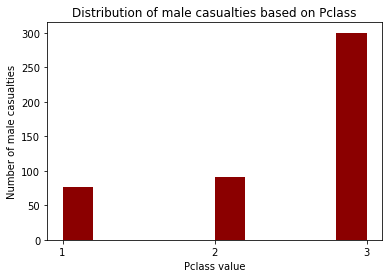

In [17]:
pclass_male_casualties = pclass[(survival_data == 0) & (gender_data == 'male')]
drawHistogram(pclass_male_casualties,'Distribution of male casualties based on Pclass',
              'Pclass value','Number of male casualties',xticks=range(1,4),color='DarkRed')

## Explore Survivors And Casualties Based On Age

- In this part of data exploration, I want to check whether did age played any role in survival.
- As a first step towards the Age data exploration, Lets take a look at age data for any anomalies.

In [18]:
titanic_data[['PassengerId','Survived','Name','Sex','Age']].head(7)

,PassengerId,Survived,Name,Sex,Age
0,1,0,"Braund, Mr. Owen Harris",male,22.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,3,1,"Heikkinen, Miss. Laina",female,26.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,5,0,"Allen, Mr. William Henry",male,35.0
5,6,0,"Moran, Mr. James",male,NaN
6,7,0,"McCarthy, Mr. Timothy J",male,54.0


- As we see that row number 5 contains NaN for Age column data,We need to drop all these values before taking the age data into consideration 
- Now lets take a look at some metrics for Age data.

In [19]:
age_data = titanic_data['Age']
survived_age_data = age_data[survival_data==1].dropna()
casualties_age_data = age_data[survival_data==0].dropna()

oldest_to_survive = survived_age_data.max()
youngest_to_survive = survived_age_data.min()

oldest_to_die = casualties_age_data.max()
youngest_to_die = casualties_age_data.min()

mean_age_survivors = survived_age_data.mean()
mean_age_casualties = casualties_age_data.mean()

print('------------------------------')
print('Oldest To Survive: ',oldest_to_survive)
print('Youngest To Survive: ',youngest_to_survive)
print('------------------------------')
print('Oldest To die: ',oldest_to_die)
print('Youngest To die: ',youngest_to_die)
print('------------------------------')
print('Mean Age Of Survivors: ',round(mean_age_survivors,2))
print('Mean Age Of Casualties: ',round(mean_age_casualties,2))
print('------------------------------')

------------------------------
Oldest To Survive:  80.0
Youngest To Survive:  0.42
------------------------------
Oldest To die:  74.0
Youngest To die:  1.0
------------------------------
Mean Age Of Survivors:  28.34
Mean Age Of Casualties:  30.63
------------------------------


- Now lets plot the Age data of both the survivors and casualties to see whether any particular age group was given             preference. 

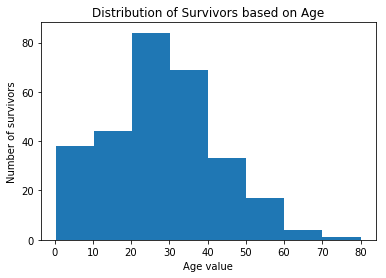

In [20]:
drawHistogram(survived_age_data,'Distribution of Survivors based on Age',
              'Age value','Number of survivors',yticks=range(0,120,20),bins=8)

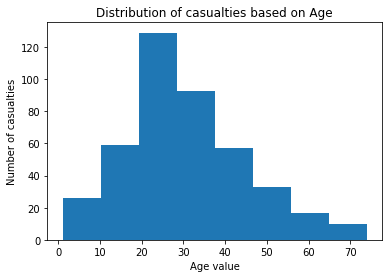

In [21]:
drawHistogram(casualties_age_data,'Distribution of casualties based on Age',
              'Age value','Number of casualties',bins=8)

- When we observe distribution of age data, Even though we see a slight bump in data at age [0 - 10] of survivors when compared to the age data of casualties, We cannot say or conclude that children might have got some preference because there is not much difference between the total no of survivors and casulaties who were of age less than 10. 

- Lets explore the data of few passengers who were of age less than 10 and did not survive.


In [22]:
child_casualties_data = titanic_data[(age_data < 10) & (survival_data == 0)]
child_casualties_data[['PassengerId','Survived','Name','Sex','Age','Ticket','Parch','Pclass']].head(10)

,PassengerId,Survived,Name,Sex,Age,Ticket,Parch,Pclass
7,8,0,"Palsson, Master. Gosta Leonard",male,2.0,349909,1,3
16,17,0,"Rice, Master. Eugene",male,2.0,382652,1,3
24,25,0,"Palsson, Miss. Torborg Danira",female,8.0,349909,1,3
50,51,0,"Panula, Master. Juha Niilo",male,7.0,3101295,1,3
63,64,0,"Skoog, Master. Harald",male,4.0,347088,2,3
119,120,0,"Andersson, Miss. Ellis Anna Maria",female,2.0,347082,2,3
147,148,0,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,W./C. 6608,2,3
164,165,0,"Panula, Master. Eino Viljami",male,1.0,3101295,1,3
171,172,0,"Rice, Master. Arthur",male,4.0,382652,1,3
182,183,0,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,347077,2,3


- Based upon above data, Lets explore the data of family members of these children. To explore the family data we need to take ticket value into consideration, as people might have booked tickets under same ticket value for all their family members.

In [23]:
ticket_data = titanic_data['Ticket']
ticket_bool = (ticket_data == '349909')|(ticket_data == '382652')|(ticket_data == '347088')|(ticket_data == '3101295')
titanic_data[(age_data > 10) &(ticket_bool) ][['PassengerId','Survived','Name','Sex','Age','Ticket','Parch']].head(10)

,PassengerId,Survived,Name,Sex,Age,Ticket,Parch
167,168,0,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,347088,4
266,267,0,"Panula, Mr. Ernesti Arvid",male,16.0,3101295,1
360,361,0,"Skoog, Mr. Wilhelm",male,40.0,347088,4
567,568,0,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,349909,4
638,639,0,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,3101295,5
686,687,0,"Panula, Mr. Jaako Arnold",male,14.0,3101295,1
885,886,0,"Rice, Mrs. William (Margaret Norton)",female,39.0,382652,5


- The above data shows that none of their family members survived.
- Now lets explore the data related to children who survived and were of age less than 10.

In [24]:
child_survivors_data = titanic_data[(age_data < 10) & (survival_data == 1)]
child_survivors_data[['PassengerId','Survived','Name','Sex','Age','Ticket','Parch','Pclass']].head(10)

,PassengerId,Survived,Name,Sex,Age,Ticket,Parch,Pclass
10,11,1,"Sandstrom, Miss. Marguerite Rut",female,4.00,PP 9549,1,3
43,44,1,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,SC/Paris 2123,2,2
58,59,1,"West, Miss. Constance Mirium",female,5.00,C.A. 34651,2,2
78,79,1,"Caldwell, Master. Alden Gates",male,0.83,248738,2,2
165,166,1,"Goldsmith, Master. Frank John William ""Frankie""",male,9.00,363291,2,3
172,173,1,"Johnson, Miss. Eleanor Ileen",female,1.00,347742,1,3
183,184,1,"Becker, Master. Richard F",male,1.00,230136,1,2
184,185,1,"Kink-Heilmann, Miss. Luise Gretchen",female,4.00,315153,2,3
193,194,1,"Navratil, Master. Michel M",male,3.00,230080,1,2
233,234,1,"Asplund, Miss. Lillian Gertrud",female,5.00,347077,2,3


- Now lets explore the data of fmaily members related to these children.

In [25]:
ticket_bool = ((ticket_data == '248738')|(ticket_data == 'SC/Paris 2123')|(ticket_data == '363291')|(ticket_data == '347077')
               |(ticket_data == 'C.A. 34651')|(ticket_data == 'F.C.C. 13529'))
data = titanic_data[(age_data > 10)&(ticket_bool)][['PassengerId','Survived','Name','Sex','Age','Ticket','Parch','Pclass']]

def highlight_max(s):
    '''
    To Highlight male rows in data
    '''
    is_max = s == 0
    if is_max['Survived'] :
        is_max = is_max | True  
         
    return ['background-color: #ff9999' if v else '' for v in is_max]

data.style.apply(highlight_max,axis=1)

- The above data shows the data related to family members of the childeren who survived the diaster. The data shows that males (rows which are red in color) didn't survive the disaster. Probably now we can relate to the fact that female and children were given preference.
- The others facts that we can produce from the data are like, if family didn't get a chance to survive, then in that case whole family died including children 
- If in case some how family got a chance to survive then females and children of that family were given preference. Though there might be some outliers with respect to above mentioned two scenarios, but both the two scenarios hold true in most of the cases.  

## Explore Survivors And Casualties Based On Parch
- Lets explore the Parch data see whether family relations played any role in passenger survival.
- Now lets a take a look at parch data of the passengers.

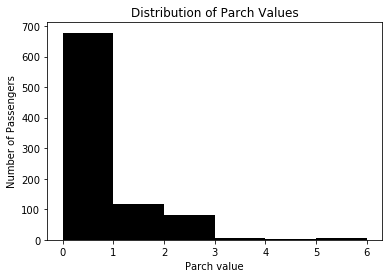

In [26]:
parch_data = titanic_data['Parch']
survived_parch_data = parch_data[survival_data==1]
casualties_parch_data = parch_data[survival_data==0]

drawHistogram(parch_data,'Distribution of Parch Values','Parch value','Number of Passengers',bins=6,color='k')

- The above Histogram shows that most of the passengers had parch value as 'Zero', i.e, they travelled alone and din't had any dependents.  
- As the Parch value indicates both the number of parents/child abroad the titanic, We wont be able to answear the questions like female survival Vs female with children survival and most of the passengers parch value is zero, therefore there is not much to explore with respect to parch value.

## Some Misc Facts 
- All the Children who were of age less than one survived the disaster.

In [27]:
misc_data = titanic_data[(age_data < 1)][['PassengerId','Survived','Pclass','Name','Sex','Age','Parch',]]

def highlight_age(s):
    '''
    highlight the age in a Series Red.
    '''
    s['Age'] = math.floor(s['Age'])
    is_max = s == 0
    return ['background-color: #ff9999' if v else '' for v in is_max]

misc_data.style.apply(highlight_age,axis=1)

- Most of the children who were of age less than 10 and didn't survive the disaster belong to plcass 3.

In [28]:
misc_data = child_casualties_data[['PassengerId','Survived','Pclass','Name','Sex','Age','Parch']]
def highlight_class(s):
    '''
    highlight the class in a Series Red.
    '''
    is_max = s == 3
    is_max['Age'] = False 
    return ['background-color: #ff9999' if v else '' for v in is_max]

misc_data.style.apply(highlight_class,axis=1)

- The People who paid the highest fair belonged to Pclass and survived the titanic disaster.

In [29]:
index = titanic_data['Fare'].argmax()
ticket_max = titanic_data.iloc[index]['Ticket']
titanic_data[titanic_data['Ticket'] == ticket_max]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292


- Around 50% of Pclass 2 males survivors where of age less than 10.

In [30]:
misc_data = (titanic_data[(pclass == 2)&(gender_data == 'male') & (survival_data == 1)]
             [['PassengerId','Survived','Pclass','Name','Sex','Age','Parch']])

def highlight_age_lessThan10(s):
    '''
    highlight the age in a Series Red.
    '''
    is_max = [False,False,False,False,False,False,False]
    if s['Age'] < 10.0:
        is_max[5] = True 
          
    return ['background-color: #ff9999' if v else '' for v in is_max]

misc_data.style.apply(highlight_age_lessThan10,axis=1)

## The Conclusion :

From the above exploration of data, we can conclude the following 
- Females were given more priority than males for life saving materials like life boats because gender based exploration shows that females had a survival rate of 68.13% which is lot higher than males.
- Females of upper class and middle class received the highest priority because Pclass exploration shows that females of upper and middle class had a survival rates of more than 90%.
- Under the Age data exploration we found out that if family didn't get chance to survive than whole family died including children and if in case family got a chance to survive then females and children were given priority.  
 